In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI'

test  test.zip	train  training.zip  trial  trial.zip


In [5]:
# import zipfile
 
# zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/training.zip"
 
# try:
#     with zipfile.ZipFile(zip_file) as z:
#         z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/train")
#         print("Extracted all")
# except:
#         print("Invalid file")

In [6]:
#import zipfile
 
#zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/test.zip"
 
#try:
#   with zipfile.ZipFile(zip_file) as z:
#        z.setpassword(pwd = bytes('*MaMiSemEval2022!', 'utf-8'))
#        z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/test")
#         print("Extracted all")
#except:
#    print("Invalid file")

In [7]:
#import zipfile
 
#zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/trial.zip"
 
#try:
#    with zipfile.ZipFile(zip_file) as z:
#         z.setpassword(pwd = bytes('*MaMiSemEval2022!', 'utf-8'))
#         z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/trial")
#         print("Extracted all")
#except:
#     print("Invalid file")

In [8]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv'

'/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv'


In [9]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/trial/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET'

1012.jpg  122.jpg   1380.jpg  191.jpg  349.jpg	524.jpg  719.jpg  919.jpg
1032.jpg  1236.jpg  1381.jpg  207.jpg  381.jpg	525.jpg  739.jpg  922.jpg
1047.jpg  1263.jpg  1384.jpg  216.jpg  383.jpg	565.jpg  741.jpg  925.jpg
104.jpg   126.jpg   1408.jpg  230.jpg  415.jpg	571.jpg  788.jpg  960.jpg
1078.jpg  1285.jpg  142.jpg   236.jpg  441.jpg	576.jpg  822.jpg  977.jpg
1094.jpg  1294.jpg  1440.jpg  246.jpg  442.jpg	58.jpg	 828.jpg  97.jpg
1132.jpg  1309.jpg  156.jpg   247.jpg  447.jpg	625.jpg  840.jpg  980.jpg
1146.jpg  1310.jpg  157.jpg   274.jpg  448.jpg	643.jpg  854.jpg  981.jpg
1159.jpg  1327.jpg  161.jpg   282.jpg  482.jpg	656.jpg  859.jpg  989.jpg
1174.jpg  133.jpg   162.jpg   28.jpg   491.jpg	666.jpg  865.jpg  trial.csv
1175.jpg  1354.jpg  165.jpg   300.jpg  492.jpg	670.jpg  872.jpg
1181.jpg  1363.jpg  175.jpg   30.jpg   519.jpg	700.jpg  899.jpg
1229.jpg  1377.jpg  181.jpg   33.jpg   520.jpg	717.jpg  89.jpg


In [10]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv'

'/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv'


In [11]:
import pandas as pd
import re
import numpy as np
import itertools
import collections
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import tensorflow as tf

from gensim.models import Word2Vec

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [12]:
# Reading the csv file into a dataframe
training_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv",'\t')
trial_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MAMI/trial/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/trial.csv",'\t')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv','\t')
# Printing the first five elements in the dataframe
print(training_data.head())
print(trial_data.head())


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


   file_name  misogynous  shaming  stereotype  objectification  violence  \
0      1.jpg           0        0           0                0         0   
1     10.jpg           1        0           0                0         1   
2   1000.jpg           0        0           0                0         0   
3  10000.jpg           0        0           0                0         0   
4  10006.jpg           0        0           0                0         0   

                                  Text Transcription  
0                                      Milk Milk.zip  
1  ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...  
2  BREAKING NEWS: Russia releases photo of DONALD...  
3                       MAN SEEKING WOMAN Ignad 18 O  
4  Me explaining the deep lore of. J.R.R. Tolkein...  
  file_name  misogynous  shaming  stereotype  objectification  violence  \
0    28.jpg           0        0           0                0         0   
1    30.jpg           0        0           0                0  

In [13]:
print(test_data.head())

   file_name                                 Text Transcription
0  15236.jpg  FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...
1  15805.jpg    SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?
2  16254.jpg         WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN
3  16191.jpg  Photographing something you want to show every...
4  15952.jpg  HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...


In [14]:
# Preprocessing - removing unwanted characters, tokenization, stop-word removal
def preprocess_data(tweet):
    user_name = '@[A-Za-z0-9]+' # Pattern for matching the user names in the tweet
    has_tag = '#[A-Za-z0-9]+' # Pattern for matching the hasgtags in the tweer
    url = 'https?:\/\/[A-Za-z0-9\.\/\-]+' # Pattern for matching the URLs in the tweet
    
    x = tweet.lower()  # Lower casing all the characters
    #x = re.sub(user_name, '@USER', x)  # Replace the username with @USER word -> Optional
    x = re.sub(user_name, '', x) # Replace the username with an empty characrer
    #x = re.sub(has_tag,'HASH',x) # Replace the hashtags with HASH word -> Optional
    x = re.sub(has_tag,'',x) # Replace the hashtags with an empty characrer
    #x = re.sub(url, 'URL', x) # Replace the URLs with URL word -> Optional
    x = re.sub(url, '', x) # Replace the URLs with an empty characrer
    x = re.sub("[^a-zA-Z0-9]", " ",x) # Replace all the characters except alphabets and digits from the tweet
    x = re.sub("rt\s+",'',x) # Replace the retweet character "rt" from the tweet
  
    tokens = word_tokenize(x) # Tokenization; splitting the text into tokens
    # negation_words = ["mustn't", "won't",'wouldn', 'doesn', "aren't","needn't",'hasn','needn', "weren't",
    #               'didn','wasn','no', 'hadn', "doesn't",'aren',  "shouldn't",'don','ain',"haven't", 'couldn',
    #               'mightn',"mightn't", 'not', "wouldn't", "hasn't", "shan't", "wasn't", "couldn't", 'won',
    #               'shouldn', 'isn', "didn't", 'haven', 'nor' "don't", "hadn't", "isn't", 'weren']

    stop_words = set(stopwords.words("english")) # Removing the most frequently occurring words (stop words) from the text               
    words = [w for w in tokens if not w in stop_words] 

    return(" ".join(words)) # Combine the tokenized words to form a sentence

In [15]:
training_data['Text Transcription'] = training_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(training_data.head())
trial_data['Text Transcription'] = trial_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(trial_data.head())
test_data['Text Transcription'] = test_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(test_data.head())

   file_name  misogynous  shaming  stereotype  objectification  violence  \
0      1.jpg           0        0           0                0         0   
1     10.jpg           1        0           0                0         1   
2   1000.jpg           0        0           0                0         0   
3  10000.jpg           0        0           0                0         0   
4  10006.jpg           0        0           0                0         0   

                                  Text Transcription  
0                                      milk milk zip  
1  roses red violets blue say yes rape quickmeme com  
2  breaking news russia releases photo donald tru...  
3                         man seeking woman ignad 18  
4  explaining deep lore j r r tolkein world arda ...  
  file_name  misogynous  shaming  stereotype  objectification  violence  \
0    28.jpg           0        0           0                0         0   
1    30.jpg           0        0           0                0  

In [16]:
# Converting the dataframe into list
training_reviews = training_data['Text Transcription'].tolist()
sentiment = training_data['misogynous'].tolist()

le = LabelEncoder()
labels = le.fit_transform(sentiment)
#Y = le.fit_transform(sentiment)
#labels = tf.keras.utils.to_categorical(labels)
tr_labels=sentiment
test_reviews = trial_data['Text Transcription'].tolist()
te_labels = trial_data['misogynous'].tolist()
new_test_reviews = test_data['Text Transcription'].tolist()

In [17]:
set(tr_labels)

{0, 1}

In [18]:
# training_reviews, test_reviews, tr_labels, te_labels = train_test_split(reviews, Y, 
#                                                                                 test_size=0.20, 
#                                                                                 random_state=42
#                                                                                 )

training_labels, test_labels = tf.keras.utils.to_categorical(tr_labels), tf.keras.utils.to_categorical(te_labels)

In [19]:
test_labels[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [20]:
print ("Number of training reviews is: ", len(training_reviews))
print ("Number of test reviews is: ", len(test_reviews))

Number of training reviews is:  10000
Number of test reviews is:  100


In [21]:
vocab_size = 4000  # number of words to keep. This number has to be the number of unique words in the corpus. 
embedding_dim = 100 # Dimension of the vector representation for each word 

max_length = 0 # Length of the lengthiest tweet
for i in range(len(training_data['Text Transcription'])):
  x = word_tokenize(training_data['Text Transcription'][i])
  if len(x) >  max_length:
    max_length = len(x)
    
print("max_length = {}".format(max_length))
oov_tok = "<OOV>"  # Token to represent Out-of-Vocabulary words

max_length = 166


In [22]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

In [23]:
# Pad the sequences so that they are all the same length
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(training_sequences,maxlen=max_length, 
                                                                padding='pre')

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_length)

In [24]:
training_padded[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [25]:
test_padded[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix




#DNN

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 166, 100)          400000    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                        

Epoch 1/20
250/250 [==============================] - 5s 4ms/step - loss: 0.6892 - accuracy: 0.5393 - val_loss: 0.6656 - val_accuracy: 0.7065
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5607 - accuracy: 0.7274 - val_loss: 0.5005 - val_accuracy: 0.7720
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4282 - accuracy: 0.8131 - val_loss: 0.4904 - val_accuracy: 0.7765
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3729 - accuracy: 0.8468 - val_loss: 0.5113 - val_accuracy: 0.7685
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3308 - accuracy: 0.8702 - val_loss: 0.5214 - val_accuracy: 0.7645
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3066 - accuracy: 0.8795 - val_loss: 0.5388 - val_accuracy: 0.7645
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.8879 - val_loss: 0.5705 - val_accuracy: 0.7590
Epoch 

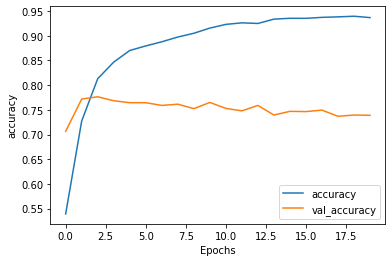

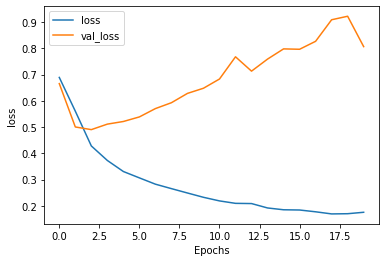

In [28]:
num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    batch_size = 32,
    #validation_data=(test_padded,test_labels),
    validation_split=0.2

)


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")




In [29]:
predict_x=model.predict(test_padded) 
y_pred=np.argmax(predict_x,axis=1)


score = model.evaluate(test_padded, test_labels,verbose=2)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))


target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names = target_names))

4/4 - 0s - loss: 0.5301 - accuracy: 0.8100 - 20ms/epoch - 5ms/step
Loss = 0.5300500392913818
Accuracy = 81.00%
[[41 15]
 [ 4 40]]
              precision    recall  f1-score   support

     class 0       0.91      0.73      0.81        56
     class 1       0.73      0.91      0.81        44

    accuracy                           0.81       100
   macro avg       0.82      0.82      0.81       100
weighted avg       0.83      0.81      0.81       100



In [30]:
# Define a function to prepare the new reviews for use with a model
# and then use the model to predict the sentiment of the new reviews           

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x]," - ", le.inverse_transform([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
 
predict_review(model, new_test_reviews)

facebook singles groups belike new woman joins group imgflip com  -  0
[0.8429386  0.15991339]


feminist eat dairy  -  1
[0.09796886 0.9030585 ]


cute girl left message seen  -  1
[0.10108409 0.89995486]


photographing something want show everyone object males woman females  -  1
[0.02464639 0.9750312 ]


hey babe make sandwich hey babe make sandwich bought boat  -  1
[0.01665894 0.9829348 ]


25 quick 5 mile run 35 buckling kid car seat  -  1
[0.15813915 0.8458097 ]


extreme rape woman picture going get hard diy despair com  -  1
[0.00520582 0.9945745 ]


ur mom says waste day watching netflix  -  0
[0.9610071  0.03892286]


women women women 0 respect  -  1
[0.03354469 0.96605855]


rape knows asked  -  1
[0.03515884 0.96459264]


computer 20 viruses 40 hot milfs area  -  1
[0.04721417 0.9526856 ]


got ta big fat ass couple std trusiongcar  -  1
[0.04783921 0.9521423 ]


dont always steal wife rie make sex slave makoorems ca  -  1
[0.05982211 0.9405546 ]


bought new guitar said

In [33]:
##LSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 166, 100)          400000    
                                                                 
 lstm_1 (LSTM)               (None, 24)                12000     
                                                                 
 dense_4 (Dense)             (None, 2)                 50        
                                                                 
Total params: 412,050
Trainable params: 412,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 10s 13ms/step - loss: 0.5505 - accuracy: 0.7180 - val_loss: 0.5096 - val_accuracy: 0.7550
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3681 - accuracy: 0.8445 - val_loss: 0.5059 - val_accuracy: 0.7660
Epoch 3/20
250/250 [======

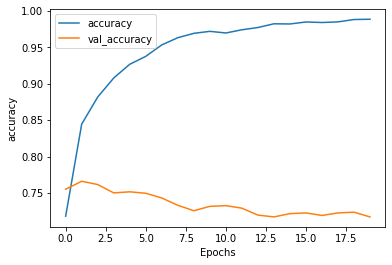

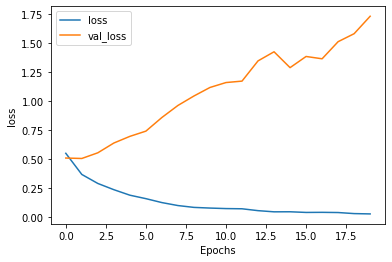

4/4 [==============================] - 0s 7ms/step - loss: 1.0487 - accuracy: 0.8400
Loss = 1.048693299293518
Accuracy = 84.00%
[[43 13]
 [ 3 41]]
              precision    recall  f1-score   support

     class 0       0.93      0.77      0.84        56
     class 1       0.76      0.93      0.84        44

    accuracy                           0.84       100
   macro avg       0.85      0.85      0.84       100
weighted avg       0.86      0.84      0.84       100



In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(24),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])



model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    #validation_data=(test_padded, test_labels),
    validation_split=0.2
)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

score = model.evaluate(test_padded, test_labels)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))

predict_x=model.predict(test_padded) 
y_pred=np.argmax(predict_x,axis=1)

target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names=target_names))

##Bidirectional LSTM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 166, 100)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 434,178
Trainable params: 434,178
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 7s 18ms/step - loss: 0.5589 - accuracy: 0.7054 - val_loss: 0.4899 - val_accuracy: 0.7680
Epoch 2/20
250/250 [==============================] - 4s 14ms/step - loss: 0.3702 - accuracy: 0.8443 - 

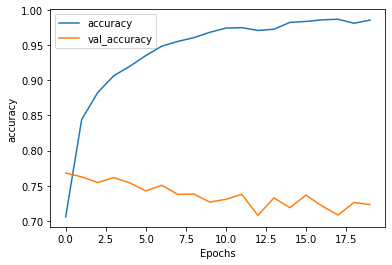

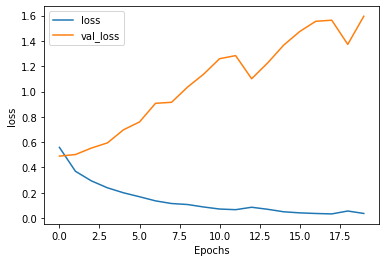

4/4 [==============================] - 0s 8ms/step - loss: 0.9047 - accuracy: 0.8400
Loss = 0.9047145247459412
Accuracy = 84.00%
[[45 11]
 [ 5 39]]
              precision    recall  f1-score   support

     class 0       0.90      0.80      0.85        56
     class 1       0.78      0.89      0.83        44

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    #validation_data=(test_padded, test_labels),
    validation_split=0.2
)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

score = model.evaluate(test_padded, test_labels)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))

predict_x=model.predict(test_padded) 
y_pred=np.argmax(predict_x,axis=1)

target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names=target_names))

In [35]:
# Define a function to prepare the new reviews for use with a model
# and then use the model to predict the sentiment of the new reviews           

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x]," - ", le.inverse_transform([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
 
predict_review(model, new_test_reviews)

facebook singles groups belike new woman joins group imgflip com  -  0
[0.67347157 0.35729507]


feminist eat dairy  -  0
[0.71206826 0.3092908 ]


cute girl left message seen  -  0
[0.73346853 0.27846628]


photographing something want show everyone object males woman females  -  0
[0.669959  0.3538968]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.6886047 0.3307042]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.6889607  0.33637664]


extreme rape woman picture going get hard diy despair com  -  0
[0.68376666 0.3263665 ]


ur mom says waste day watching netflix  -  0
[0.6509227 0.389495 ]


women women women 0 respect  -  0
[0.7132045 0.3007698]


rape knows asked  -  0
[0.68032926 0.33007476]


computer 20 viruses 40 hot milfs area  -  0
[0.66491514 0.3553158 ]


got ta big fat ass couple std trusiongcar  -  0
[0.6826661 0.3394853]


dont always steal wife rie make sex slave makoorems ca  -  0
[0.67415386 0.34954002]


bought new guitar said going sel

##Bidirectional GRU

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 166, 100)          400000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 48)               18144     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 2)                 98        
                                                                 
Total params: 418,242
Trainable params: 418,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 7s 17ms/step - loss: 0.5549 - accuracy: 0.7063 - val_loss: 0.4972 - val_accuracy: 0.7620
Epoch 2/20
250/250 [==============================] - 4s 14ms/step - loss: 0.3684 - accuracy: 0.8411 - 

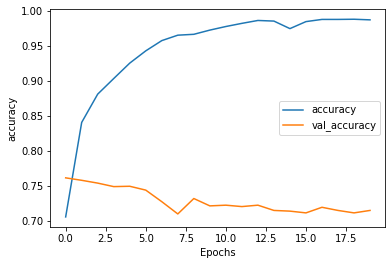

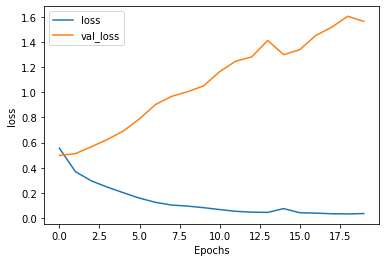

4/4 [==============================] - 0s 8ms/step - loss: 0.6489 - accuracy: 0.8700
Loss = 0.6489124298095703
Accuracy = 87.00%
[[45 11]
 [ 2 42]]
              precision    recall  f1-score   support

     class 0       0.96      0.80      0.87        56
     class 1       0.79      0.95      0.87        44

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(24)), 
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    #validation_data=(test_padded, test_labels),
    validation_split=0.2
)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

score = model.evaluate(test_padded, test_labels)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))

predict_x=model.predict(test_padded) 
y_pred=np.argmax(predict_x,axis=1)

target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names=target_names))

In [37]:
# Define a function to prepare the new reviews for use with a model
# and then use the model to predict the sentiment of the new reviews           

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x]," - ", le.inverse_transform([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
 
predict_review(model, new_test_reviews)

facebook singles groups belike new woman joins group imgflip com  -  0
[0.62665373 0.32678935]


feminist eat dairy  -  0
[0.6866064  0.27307683]


cute girl left message seen  -  0
[0.7089296  0.28369698]


photographing something want show everyone object males woman females  -  0
[0.6408362  0.31109998]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.6708578  0.29745457]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.66259074 0.29257324]


extreme rape woman picture going get hard diy despair com  -  0
[0.6512228 0.312216 ]


ur mom says waste day watching netflix  -  0
[0.6280537  0.32779774]


women women women 0 respect  -  0
[0.7022042  0.28620318]


rape knows asked  -  0
[0.7125941  0.26956916]


computer 20 viruses 40 hot milfs area  -  0
[0.6235793 0.3200105]


got ta big fat ass couple std trusiongcar  -  0
[0.6448887  0.30855402]


dont always steal wife rie make sex slave makoorems ca  -  0
[0.6257877  0.32246536]


bought new guitar said goi

##Bidirectional stacked LSTM 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 166, 100)          400000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 166, 128)         84480     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 166, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                      

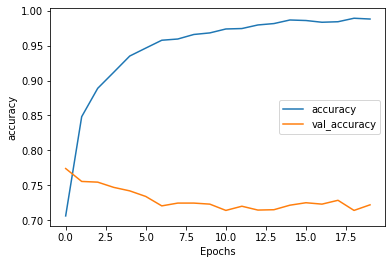

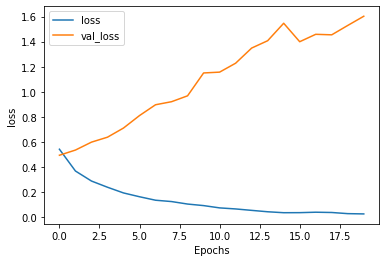

4/4 [==============================] - 0s 19ms/step - loss: 0.9382 - accuracy: 0.8200
Loss = 0.9381604194641113
Accuracy = 82.00%
[[45 11]
 [ 2 42]]
              precision    recall  f1-score   support

     class 0       0.96      0.80      0.87        56
     class 1       0.79      0.95      0.87        44

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),                                                  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    #validation_data=(test_padded, test_labels),
    validation_split=0.2
)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

score = model.evaluate(test_padded, test_labels)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))

target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names=target_names))

In [39]:
# Define a function to prepare the new reviews for use with a model
# and then use the model to predict the sentiment of the new reviews           

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x]," - ", le.inverse_transform([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
 
predict_review(model, new_test_reviews)

facebook singles groups belike new woman joins group imgflip com  -  0
[0.48303044 0.14104086]


feminist eat dairy  -  0
[0.48003402 0.14139931]


cute girl left message seen  -  0
[0.4823421 0.1415842]


photographing something want show everyone object males woman females  -  0
[0.4797157  0.14096947]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.48099738 0.14092104]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.4817951  0.14144683]


extreme rape woman picture going get hard diy despair com  -  0
[0.4798069  0.14171843]


ur mom says waste day watching netflix  -  0
[0.48173696 0.14068846]


women women women 0 respect  -  0
[0.48094705 0.14170685]


rape knows asked  -  0
[0.47963518 0.14167602]


computer 20 viruses 40 hot milfs area  -  0
[0.48006445 0.14102517]


got ta big fat ass couple std trusiongcar  -  0
[0.4825167  0.14137758]


dont always steal wife rie make sex slave makoorems ca  -  0
[0.48251453 0.14152716]


bought new guitar said g

##Bidirectional GRU Stacked

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 166, 100)          400000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 166, 128)         63744     
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 166, 128)         74496     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                      

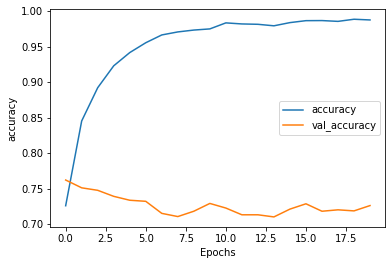

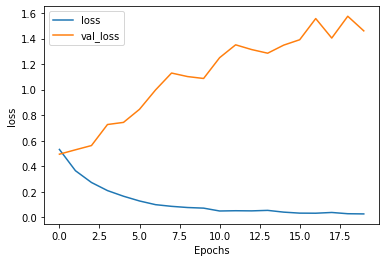

4/4 [==============================] - 0s 16ms/step - loss: 0.8237 - accuracy: 0.8300
Loss = 0.8236900568008423
Accuracy = 83.00%
[[45 11]
 [ 2 42]]
              precision    recall  f1-score   support

     class 0       0.96      0.80      0.87        56
     class 1       0.79      0.95      0.87        44

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),                                                  
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)), 
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 20
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    #validation_data=(test_padded, test_labels),
    validation_split=0.2
)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

score = model.evaluate(test_padded, test_labels)
print("Loss = {}".format(score[0]))
print("Accuracy = {0:.2f}%".format(score[1]*100))

target_names = ['class 0', 'class 1']
print(confusion_matrix(te_labels,y_pred))
print(classification_report(te_labels, y_pred,target_names=target_names))

In [41]:
# Define a function to prepare the new reviews for use with a model
# and then use the model to predict the sentiment of the new reviews           

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x]," - ", le.inverse_transform([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
 
predict_review(model, new_test_reviews)

facebook singles groups belike new woman joins group imgflip com  -  0
[0.9568747  0.92877495]


feminist eat dairy  -  0
[0.9227592  0.51854473]


cute girl left message seen  -  0
[0.97637856 0.7980101 ]


photographing something want show everyone object males woman females  -  0
[0.9632474 0.8007958]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.9690194  0.86188424]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.9684378  0.65798867]


extreme rape woman picture going get hard diy despair com  -  0
[0.9324771  0.60449934]


ur mom says waste day watching netflix  -  0
[0.9439648  0.89216554]


women women women 0 respect  -  0
[0.93606204 0.5197028 ]


rape knows asked  -  0
[0.93910897 0.5295464 ]


computer 20 viruses 40 hot milfs area  -  0
[0.95464045 0.7737673 ]


got ta big fat ass couple std trusiongcar  -  0
[0.9694108 0.8485447]


dont always steal wife rie make sex slave makoorems ca  -  0
[0.96793985 0.90752447]


bought new guitar said goi